The necessary imports

In [1]:
import tensorflow as tf
import numpy as np
import os
import ast
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical



/Users/anantanillahamge/Desktop/New_projects/ml_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Okay, first we have to parse the files we have so that we can create a valid input to feed our neural network


In [2]:

def parse_sol(path):
    board = np.zeros((9, 9))        
    with open(path, "r") as file:
        lines = file.read().splitlines()
    board = [ast.literal_eval(line) for line in lines if line.strip() != ""]
    return board
    


In [3]:
import re

def parse_killer(path):
    cage_id_grid = np.zeros((9,9), dtype = int)    
    cage_sum_grid = np.zeros((9,9), dtype = int)    

    with open(path) as file:
        lines = file.read().splitlines()

        i = 0
        for line in lines:

            coordinates = re.findall(r"\((\d+),\s*(\d+)\)",line)
            sum = int(line.split("=")[0])

            for row, col in coordinates:
                cage_id_grid[int(row)][int(col)] = i
                cage_sum_grid[int(row)][int(col)] = sum
            i += 1
    return cage_id_grid, cage_sum_grid


In [4]:

def build(base_path):
    X = []
    y = []

    for i in range(1500):

        ans_path = os.path.join(base_path, f"{i}.ans")
        killer_path = os.path.join(base_path, f"{i}.killer")


        solution = parse_sol(ans_path)
        cage_ids, cage_sums = parse_killer(killer_path)

        input_tensor = np.stack([cage_ids / np.max(cage_ids),
                                 cage_sums / 45,
                                 ], axis = -1)
        
        target = to_categorical(np.array(solution) - 1, 9)
        X.append(input_tensor)
        y.append(target)

    X = np.array(X)
    y = np.array(y)
    return X, y


In [5]:
base_path = "KRProject_1/2"
X, y  = build(base_path)

In [6]:
X.shape, y.shape

((1500, 9, 9, 2), (1500, 9, 9, 9))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [8]:
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((1200, 9, 9, 2), (300, 9, 9, 2)), ((1200, 9, 9, 9), (300, 9, 9, 9)))

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu' ,padding = 'same', input_shape = (9, 9, 2)))

model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation = 'relu' ,padding = 'same' ))

model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation = 'relu' ,padding = 'same' ))

model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3,3), activation = 'relu' ,padding = 'same' ))

model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(9, (1,1), activation = 'softmax', padding = 'same'))

/Users/anantanillahamge/Desktop/New_projects/ml_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 9, 9, 32)       │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 9)        │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390,441 (1.49 MB)

 Trainable params: 390,441 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs = 1000, batch_size= 64,validation_split=0.2)

Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1299 - loss: 2.1889 - val_accuracy: 0.2202 - val_loss: 2.0931
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2047 - loss: 2.0701 - val_accuracy: 0.2864 - val_loss: 1.8613
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2569 - loss: 1.8963 - val_accuracy: 0.3072 - val_loss: 1.7498
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.2851 - loss: 1.7876 - val_accuracy: 0.3191 - val_loss: 1.6840
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2992 - loss: 1.7285 - val_accuracy: 0.3270 - val_loss: 1.6386
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3103 - loss: 1.6831 - val_accuracy: 0.3295 - val_loss: 1.6148
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3183 - loss: 1.6587 - val_accuracy: 0.3355 - val_loss: 1.5989
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3251 - loss: 1.6386 - val_accu

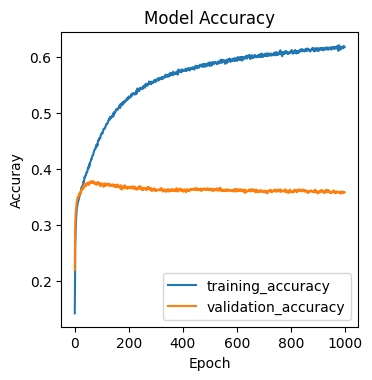

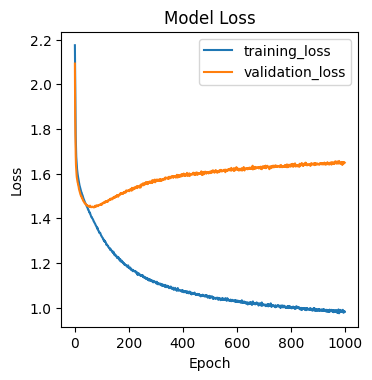

In [12]:
plt.figure(figsize = (36,36))
plt.subplot(8, 8, 1)
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuray')
plt.legend()

plt.figure(figsize = (36,36))
plt.subplot(8, 8, 1)
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.show()
